#Linear Regression
Linear Regression is a supervised learning technique that involves learning the relationship between the features and the target. The target values are continuous, which means that the values can take any values between an interval. For example, 1.2, 2.4, and 5.6 are considered to be continuous values. Use-cases of regression include stock market price prediction, house price prediction, sales prediction, and etc.

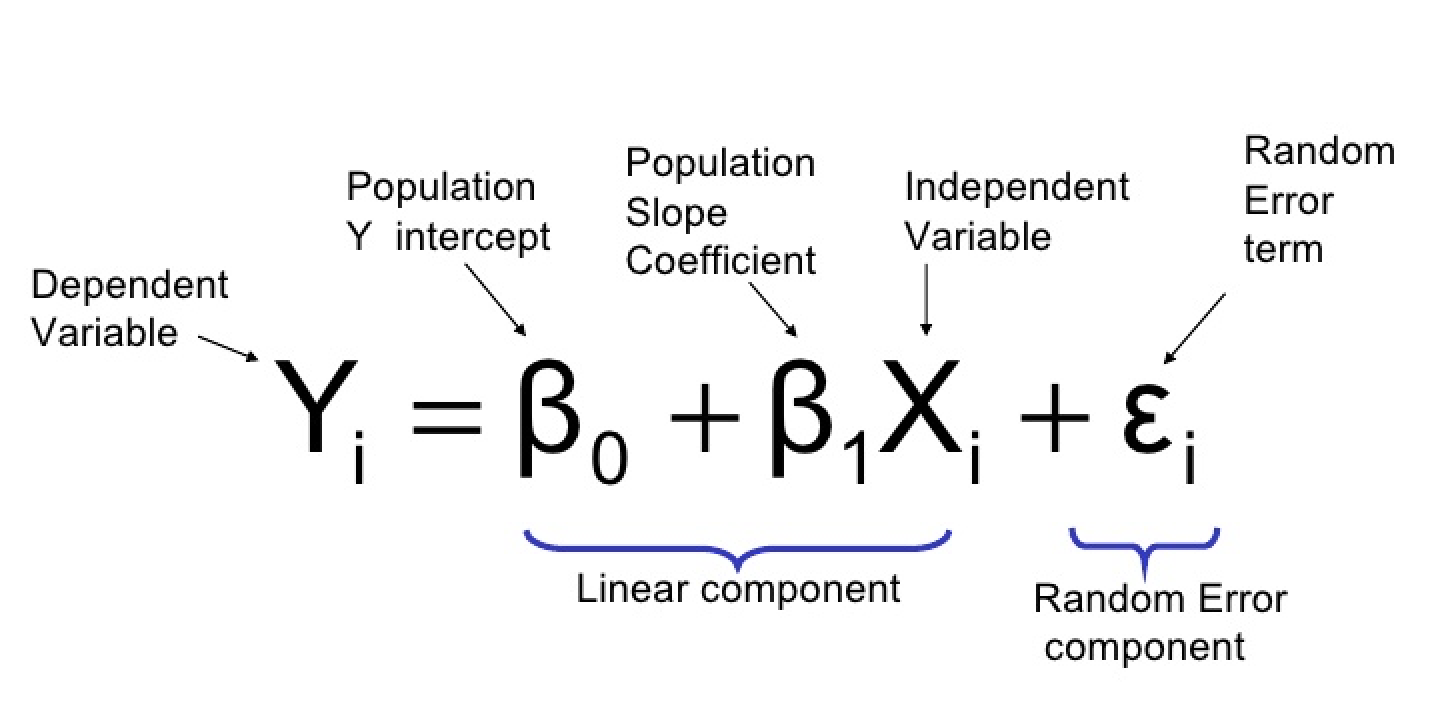

In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook last run (end-to-end): 2023-08-26 23:16:16.176707


#Creating data to view and fit
Since we're working on a regression problem (predicting a number) let's create some linear data (a straight line) to model.

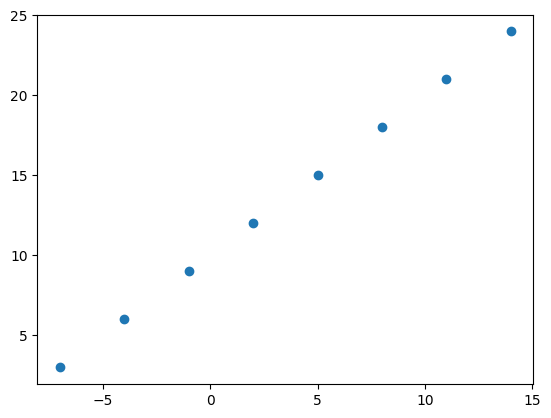

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

#Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.



---



Our goal here will be to use X to predict y.

So our input will be X and our output will be y.

Knowing this, what do you think our input and output shapes will be?

Let's take a look.

In [4]:
# Lets check the shape of single example X
input_shape = X[0].shape

# Check the shape of single example of y
output_shape = y[0].shape

input_shape, output_shape # These are both scalars (no Shape)


((), ())

##Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

- Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

- Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

- Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics = ["mae"])

# Fitting the model
model.fit(tf.expand_dims(X, axis = 1), y, epochs = 100) # Training for 100 epochs

Epoch 1/100
1/1 [==============================] - 1s 791ms/step - loss: 11.4884 - mae: 11.4884
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 11.3559 - mae: 11.3559
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2234 - mae: 11.2234
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0909 - mae: 11.0909
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9584 - mae: 10.9584
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8259 - mae: 10.8259
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6934 - mae: 10.6934
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5609 - mae: 10.5609
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4284 - mae: 10.4284
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2959 - mae: 10.2959
Epoch 11/100
1/1 [==============================] 

In [6]:
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [7]:
# Lets predict using our model
model.predict([13.0])

1/1 [==============================] - 0s 314ms/step


array([[22.86181]], dtype=float32)

# Let's make bigger dataset

In [8]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [9]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [11]:
# Same result as above if we add y = X + 10
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

# Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

- Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
- Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [13]:
len(X), len(y)

(50, 50)

In [21]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing our data

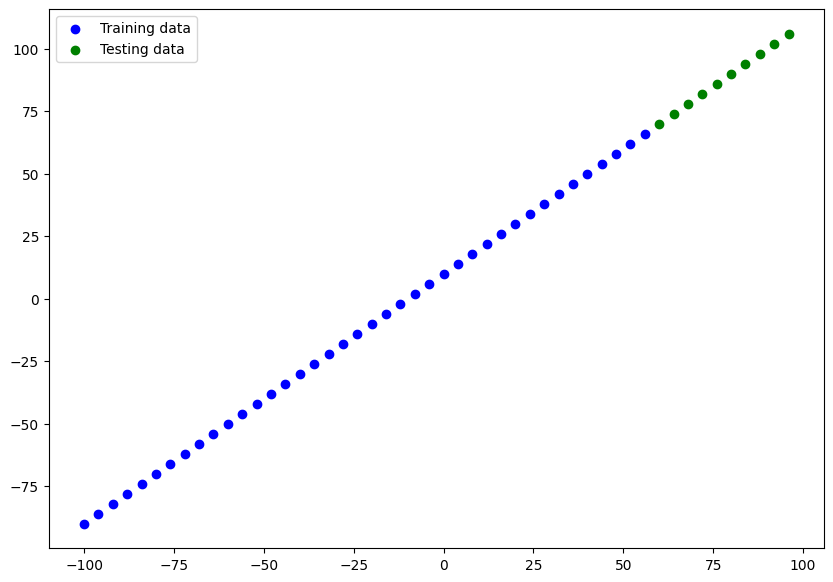

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

# Build a model

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# Compile the model
model.compile(loss = tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [24]:
# Get the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Fit our model
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 14ms/step - loss: 30.3554 - mae: 30.3554
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 9.7013 - mae: 9.7013
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 10.8822 - mae: 10.8822
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4249 - mae: 9.4249
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3141 - mae: 10.3141
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 9.5581 - mae: 9.5581
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.6762 - mae: 8.6762
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0464 - mae: 9.0464
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0296 - mae: 19.0296
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.2639 - mae: 10.2639
Epoch 11/100
2/2 [==============================] - 0s 8ms/step

In [27]:
# Check the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


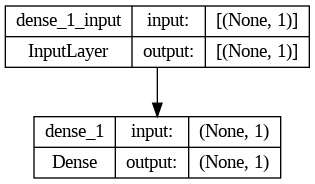

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

# Visualizing the predictions

In [31]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 304ms/step


In [32]:
y_preds

array([[42.910755],
       [45.683308],
       [48.45586 ],
       [51.22841 ],
       [54.000957],
       [56.77351 ],
       [59.546062],
       [62.31861 ],
       [65.09116 ],
       [67.863716]], dtype=float32)

In [38]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();




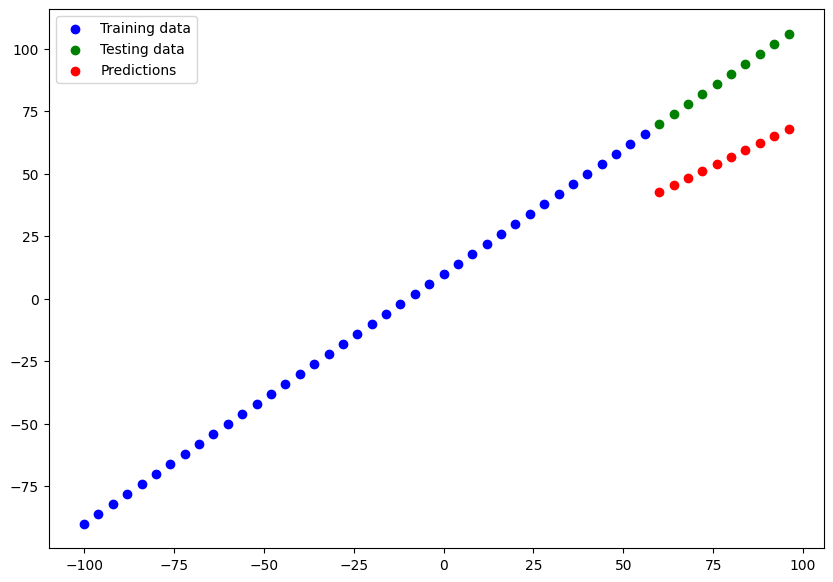

In [39]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)


From the plot we can see our predictions aren't totally outlandish but they definitely aren't anything special either.

# Evaluating predictions

Two of the main metrics used for regression problems are:

- Mean absolute error (MAE) - the mean difference between each of the predictions.
- Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 586ms/step - loss: 32.6128 - mae: 32.6128


[32.612762451171875, 32.612762451171875]

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.089245, 42.316692, 39.54414 , 36.77159 , 33.999043, 31.22649 ,
       28.453938, 25.68139 , 22.908836, 20.136284], dtype=float32)>

In [42]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [43]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[42.910755],
       [45.683308],
       [48.45586 ],
       [51.22841 ],
       [54.000957],
       [56.77351 ],
       [59.546062],
       [62.31861 ],
       [65.09116 ],
       [67.863716]], dtype=float32)

In [44]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [45]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [46]:

# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([42.910755, 45.683308, 48.45586 , 51.22841 , 54.000957, 56.77351 ,
        59.546062, 62.31861 , 65.09116 , 67.863716], dtype=float32))

In [47]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=32.612762>

In [49]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1076.0221>

In [53]:

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


# Running experiments to improve a model

# `Build model_1`

In [50]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 67.9452 - mae: 67.9452
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 32.7886 - mae: 32.7886
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5698 - mae: 9.5698
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.6540 - mae: 11.6540
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 13.0479 - mae: 13.0479
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 7.6613 - mae: 7.6613
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 13.3160 - mae: 13.3160
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.7602 - mae: 7.7602
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 19.9465 - mae: 19.9465
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 13.7393 - mae: 13.7393
Epoch 11/100
2/2 [==============================] - 0s 16ms/

1/1 [==============================] - 0s 71ms/step


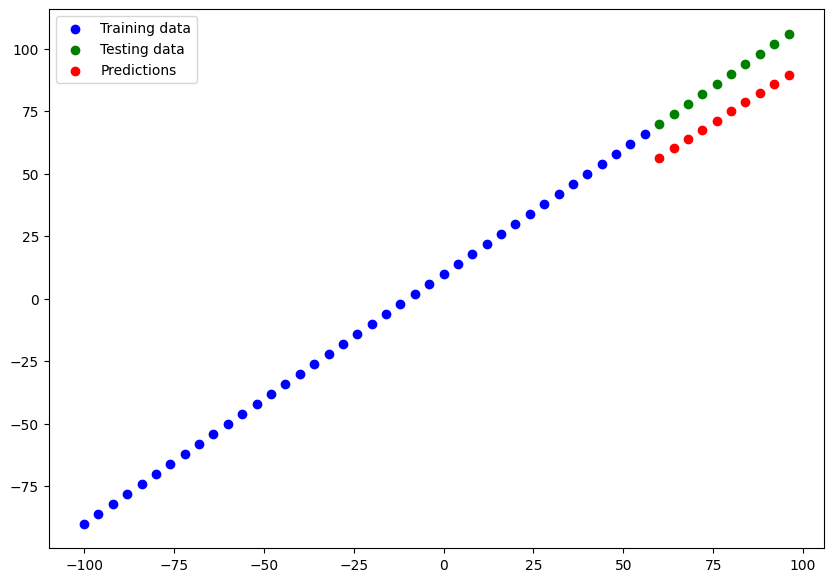

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [54]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(14.920767, 223.46335)

# `Build model_2`

In [55]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 27ms/step


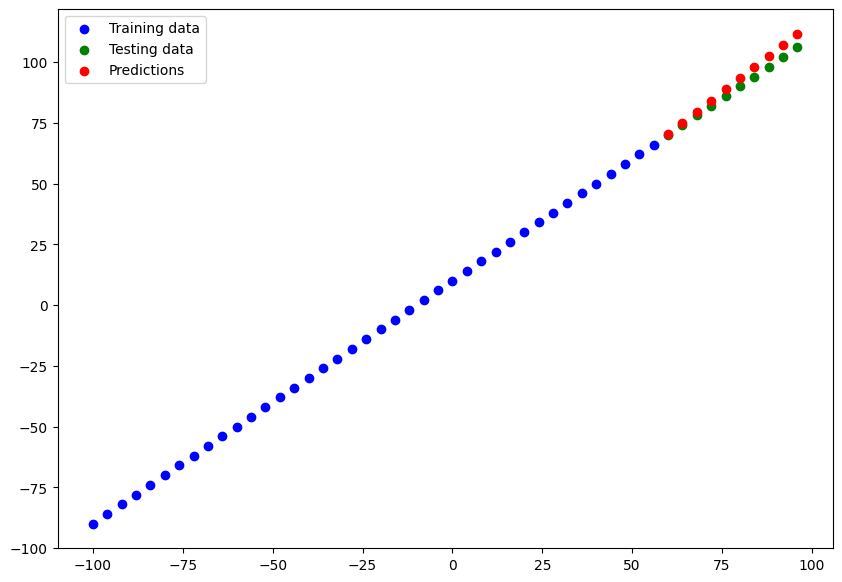

In [57]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [59]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.0036476, 11.79026)

# `Build model_3`

In [60]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 79ms/step


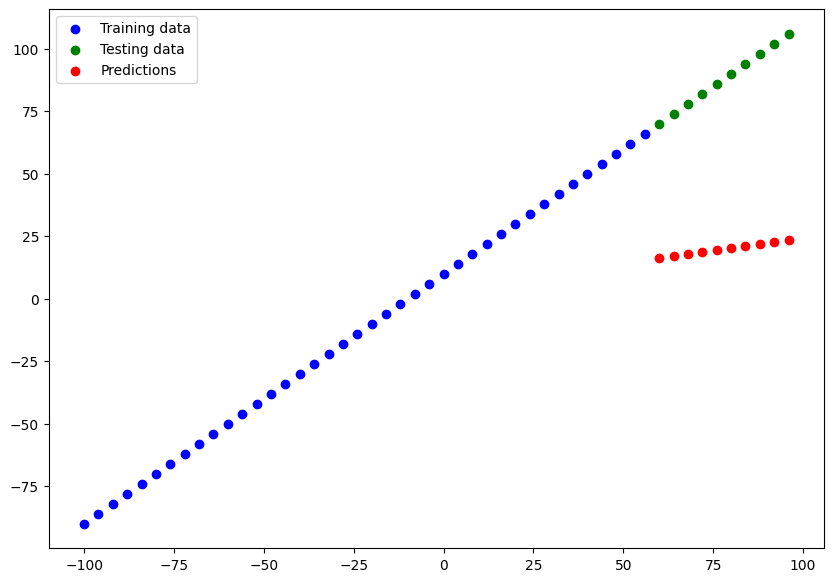

In [61]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [63]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3


(68.07649, 4719.2515)

# Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [65]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [66]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.920767,223.463348
1,model_2,3.003648,11.790260
2,model_3,68.076492,68.076492


From our experiments, it looks like model_2 performed the best.

# Tracking your experiments

# Saving a model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [67]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [68]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [69]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [70]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model
We can load a saved model using the load_model() method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [72]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 62ms/step


True

In [74]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 89ms/step


True

# A larger example
Alright, we've seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) available from Kaggle

In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [87]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [88]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- `make_column_transformer` - build a multi-step data preprocessing function for the folllowing transformations:
- `MinMaxScaler` - make sure all numerical columns are normalized (between 0 and 1).
- `OneHotEncoder` - one hot encode the non-numerical columns.

In [93]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Now we'll split data into features `(X)` and labels `(y)`.

In [94]:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


In [95]:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [97]:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [98]:

# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [99]:

# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [100]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape


((1070, 11), (1070, 6))

In [102]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
history = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

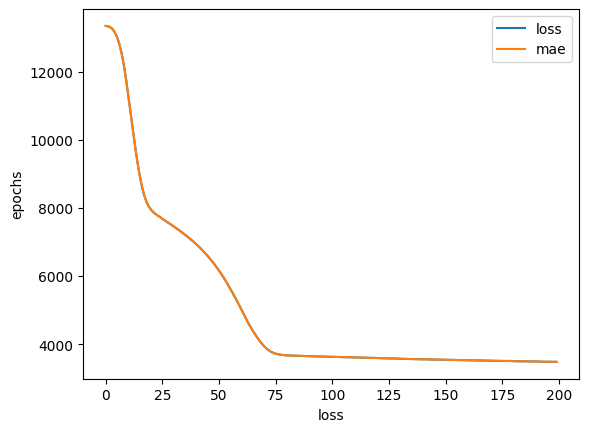

In [103]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs");

In [104]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 4ms/step - loss: 3166.4087 - mae: 3166.4087
